In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [41]:
#status = pd.read_csv('status.csv')


In [42]:
trips = pd.read_csv('trip.csv')

In [43]:
station = pd.read_csv('station.csv')

In [44]:
trips.head(3)

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code
0,4576,63,8/29/2013 14:13,South Van Ness at Market,66,8/29/2013 14:14,South Van Ness at Market,66,520,Subscriber,94127
1,4607,70,8/29/2013 14:42,San Jose City Hall,10,8/29/2013 14:43,San Jose City Hall,10,661,Subscriber,95138
2,4130,71,8/29/2013 10:16,Mountain View City Hall,27,8/29/2013 10:17,Mountain View City Hall,27,48,Subscriber,97214


In [45]:
trips.columns

Index(['id', 'duration', 'start_date', 'start_station_name',
       'start_station_id', 'end_date', 'end_station_name', 'end_station_id',
       'bike_id', 'subscription_type', 'zip_code'],
      dtype='object')

In [46]:
minimasDuraciones = trips['duration'].sort_values(inplace=False).head()
maximasDuraciones = trips['duration'].sort_values(ascending= False,inplace=False).head()
print(minimasDuraciones)
print('---')
print(maximasDuraciones)

301480    60
252114    60
79739     60
618094    60
547555    60
Name: duration, dtype: int64
---
573566    17270400
382718     2137000
440339     1852590
371066     1133540
80510       722236
Name: duration, dtype: int64


In [47]:
trips.head()

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code
0,4576,63,8/29/2013 14:13,South Van Ness at Market,66,8/29/2013 14:14,South Van Ness at Market,66,520,Subscriber,94127
1,4607,70,8/29/2013 14:42,San Jose City Hall,10,8/29/2013 14:43,San Jose City Hall,10,661,Subscriber,95138
2,4130,71,8/29/2013 10:16,Mountain View City Hall,27,8/29/2013 10:17,Mountain View City Hall,27,48,Subscriber,97214
3,4251,77,8/29/2013 11:29,San Jose City Hall,10,8/29/2013 11:30,San Jose City Hall,10,26,Subscriber,95060
4,4299,83,8/29/2013 12:02,South Van Ness at Market,66,8/29/2013 12:04,Market at 10th,67,319,Subscriber,94103


In [48]:
#pd.DataFrame(maximasDuraciones).join(trips, left_index=True, how='inner')
trips.loc[maximasDuraciones.index]

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code
573566,568474,17270400,12/6/2014 21:59,South Van Ness at Market,66,6/24/2015 20:18,2nd at Folsom,62,535,Customer,95531
382718,825850,2137000,6/28/2015 21:50,Market at Sansome,77,7/23/2015 15:27,Yerba Buena Center of the Arts (3rd @ Howard),68,466,Customer,97213
440339,750192,1852590,5/2/2015 6:17,San Antonio Shopping Center,31,5/23/2015 16:53,Castro Street and El Camino Real,32,680,Subscriber,94024
371066,841176,1133540,7/10/2015 10:35,University and Emerson,35,7/23/2015 13:27,University and Emerson,35,262,Customer,94306
80510,111309,722236,11/30/2013 13:29,University and Emerson,35,12/8/2013 22:06,University and Emerson,35,247,Customer,94301


## Duraciones entre customers y subscribers

In [49]:
tripsCustomer = trips[trips['subscription_type'] == 'Customer']
tiempo = tripsCustomer['duration'].sum()/ len(tripsCustomer)
print('el promedio de duracion de los customers es',tiempo, 's')

el promedio de duracion de los customers es 3951.76132851 s


In [50]:
tripsSubscribers = trips[trips['subscription_type'] == 'Subscriber']
tiempo = tripsSubscribers['duration'].sum()/ len(tripsSubscribers)
print('el promedio de duracion de los subcribers es',tiempo, 's')

el promedio de duracion de los subcribers es 590.048856101 s


##  lugares mas frecuentes

In [51]:
print(trips['start_station_name'].value_counts().head())
print('--')
print(trips['end_station_name'].value_counts().head())

San Francisco Caltrain (Townsend at 4th)         49092
San Francisco Caltrain 2 (330 Townsend)          33742
Harry Bridges Plaza (Ferry Building)             32934
Embarcadero at Sansome                           27713
Temporary Transbay Terminal (Howard at Beale)    26089
Name: start_station_name, dtype: int64
--
San Francisco Caltrain (Townsend at 4th)    63179
San Francisco Caltrain 2 (330 Townsend)     35117
Harry Bridges Plaza (Ferry Building)        33193
Embarcadero at Sansome                      30796
2nd at Townsend                             28529
Name: end_station_name, dtype: int64


los lugares mas frecuentes son San Francisco Caltrain, San Francisco Caltrain 2, y Harry Bridges Plaza

In [52]:
print('Subscribers')
print('--')
print(tripsSubscribers['start_station_name'].value_counts().head())
print('\nCustomers')
print('--')
print(tripsCustomer['start_station_name'].value_counts().head())

Subscribers
--
San Francisco Caltrain (Townsend at 4th)         45842
San Francisco Caltrain 2 (330 Townsend)          31962
Temporary Transbay Terminal (Howard at Beale)    25050
Harry Bridges Plaza (Ferry Building)             23502
2nd at Townsend                                  22482
Name: start_station_name, dtype: int64

Customers
--
Embarcadero at Sansome                  10445
Harry Bridges Plaza (Ferry Building)     9432
Market at 4th                            4521
Powell Street BART                       3932
Embarcadero at Vallejo                   3810
Name: start_station_name, dtype: int64


In [53]:
print('Cantidad de Clientes',len(tripsCustomer))
print('Cantidad de Suscriptores',len(tripsSubscribers))

Cantidad de Clientes 103213
Cantidad de Suscriptores 566746


    Sin embargo si comparamos entre subscribers y customers, vemos que los customers alquilan mas desde distintos lugares, seguramente porque los lugares donde alquilan los subscribers sean puntos mas turisticos, donde las personas se subscriban y no necesiten ser clientes. Por otro lado, los customers alquilan mas desde lugares donde viajen seguido o vayan a trabajar, como el Market at 4th. Tambien se ve que inician muchos viajes en embarcaderos, muchos mas que en subscribers. Esto puede significar que tengan mas decidido hacer un viaje en bicicleta, seguramente sea parte de la rutina, y esto lleve a ser cliente.
    Se ve tambien que 

# Cantidad de viajes según la hora

In [54]:
trips_by_hr = trips[['start_date']]

In [55]:
# Llevo todas las fechas a formato DateTime
trips_by_hr.start_date = pd.to_datetime(trips_by_hr.start_date, format='%m/%d/%Y %H:%M')

/home/carlos/Documentos/7506-OrgaDatos/tp1datos/lib/python3.6/site-packages/pandas/core/generic.py:2773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [56]:
# Cambio el nombre de la columna por "hour"
trips_by_hr.columns.values[0] = 'hour'

In [57]:
# Me quedo solo con la hora
trips_by_hr = trips_by_hr.apply(lambda x: x.dt.hour)

In [58]:
# Cuento la cantidad de viajes por cada hora
hours = {}
for d in trips_by_hr.values.flat:
    if d not in hours:
        hours[d] = 1
    else:
        hours[d] += 1

In [59]:
# Armo un df con las horas como índice y las cantidades como valores
trips_by_hr = pd.DataFrame.from_dict(hours, orient='index')
trips_by_hr['trips'] = trips_by_hr[0]
del trips_by_hr[0]
trips_by_hr.sort_index(inplace=True)

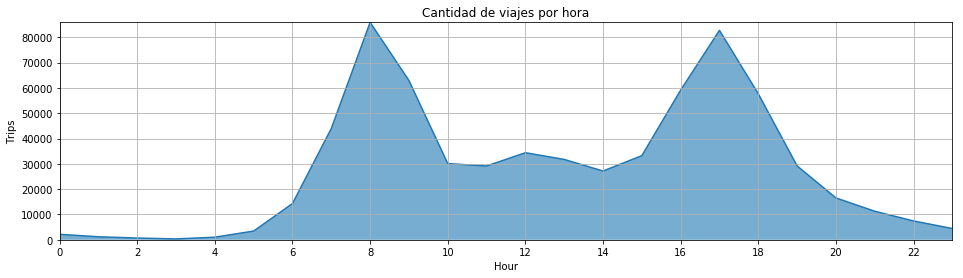

In [39]:
plt.figure(figsize=(16,4))
plt.plot(trips_by_hr)
plt.grid()
plt.xticks([i for i in range(0,25,2)])
plt.title('Cantidad de viajes por hora')
plt.xlabel('Hour')
plt.ylabel('Trips')
plt.autoscale(tight=True)
plt.fill_between(trips_by_hr.index, trips_by_hr.trips, alpha=0.6)
plt.show()